📍Introduction

Welcome to "AutoScout Data Analysis Project". This is the capstone project of Data Analysis Module. Auto Scout data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

📌The project consists of 3 parts:

🔍First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.

🔍Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.

🔍Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.

🔍Need to Study :

.str.method  
.contains()    
.extract()    
.to_datetime()   
.get_dummies()     
.add_prefix()      
.sample()    
.regex   
.to_numeric()    
.isin()     
.corr()      

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('this will not show')

In [3]:
df=pd.read_csv('part_2_final_scout_not_dummy.csv')
df.head()

,Price,km,hp,Type,Warranty,Brand,Model,Age,Nr_of_Doors,Number_of_Seats,...,VAT_Deductable,Price_Negotiable,Prev_Owner,Inspection_New,Body_Color,Paint_Type,Uphol_Material,Country_Cons,City_Cons,Comb_Cons
0,15770,56013.0,66.0,Used,12.0,Audi,A1,3.0,5.0,5.0,...,True,False,2.0,Yes,Black,Metallic,Cloth,4.3,3.5,3.8
1,14500,80000.0,141.0,Used,12.0,Audi,A1,2.0,3.0,4.0,...,False,True,1.0,No,Red,Metallic,Cloth,7.1,4.7,5.6
2,14640,83450.0,85.0,Used,12.0,Audi,A1,3.0,4.0,4.0,...,True,False,1.0,No,Black,Metallic,Cloth,4.4,3.4,3.8
3,14500,73000.0,66.0,Used,12.0,Audi,A1,3.0,3.0,4.0,...,False,False,1.0,No,Brown,Metallic,Cloth,4.3,3.5,3.8
4,16790,16200.0,66.0,Used,12.0,Audi,A1,3.0,5.0,5.0,...,False,False,1.0,Yes,Black,Metallic,Cloth,4.6,3.8,4.1


## FUNCTIONS

In [4]:
def check_col(df,check_col):
    print(check_col,", Sumation of isnull :",df[check_col].isnull().sum())
    print("-----------------")
    print( "Samples for",check_col, "\n", df[check_col].sample(10))
    print("-----------------")
    print(check_col, "Value_counts is", "\n",df[check_col].value_counts(dropna=False))

In [5]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [6]:
def fill_most(df, group_col, col_name):
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond][col_name].mode()[0])
        else:
            df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[col_name].mode()[0])
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [7]:
def fill_prop(df, group_col, col_name):
    '''Fills the missing values with "ffill and bfill method" according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [8]:
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill"
    '''Fills the missing values based on selected method (mode/median/ffill) according to two-stage grouping'''
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if (mode1 != []) and (mode2 != []):
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond2][col_name].mode()[0]).fillna(df[cond1][col_name].mode()[0])
                elif mode1 != []:
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond1][col_name].mode()[0])
                else:
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [9]:
df.head(5).T

,0,1,2,3,4
Price,15770,14500,14640,14500,16790
km,56013.0,80000.0,83450.0,73000.0,16200.0
hp,66.0,141.0,85.0,66.0,66.0
Type,Used,Used,Used,Used,Used
Warranty,12.0,12.0,12.0,12.0,12.0
Brand,Audi,Audi,Audi,Audi,Audi
Model,A1,A1,A1,A1,A1
Age,3.0,2.0,3.0,3.0,3.0
Nr_of_Doors,5.0,3.0,4.0,3.0,5.0
Number_of_Seats,5.0,4.0,4.0,4.0,5.0


In [10]:
df.shape

(15919, 33)

In [11]:
list(df.columns)

['Price',
 'km',
 'hp',
 'Type',
 'Warranty',
 'Brand',
 'Model',
 'Age',
 'Nr_of_Doors',
 'Number_of_Seats',
 'Gearing_Type',
 'Engine_Disp_cc',
 'Cylinders',
 'Drive_chain',
 'Fuel',
 'CO2_Emission',
 'Emission_Class',
 'Comfort_Convenience',
 'Entertainment_Media',
 'Extras',
 'Safety_Security',
 'Gears',
 'Body_Type',
 'VAT_Deductable',
 'Price_Negotiable',
 'Prev_Owner',
 'Inspection_New',
 'Body_Color',
 'Paint_Type',
 'Uphol_Material',
 'Country_Cons',
 'City_Cons',
 'Comb_Cons']

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,15919.0,18019.896727,7386.169409,13.0,12850.0,16900.0,21900.0,74600.0
km,15919.0,32329.414691,36881.261861,0.0,3000.0,20550.0,47000.0,317000.0
hp,15919.0,88.541617,26.689225,51.0,66.0,85.0,103.0,294.0
Warranty,15919.0,18.111753,10.272870,1.0,12.0,12.0,24.0,72.0
Age,15919.0,1.417614,1.104472,0.0,0.0,1.0,2.0,3.0
Nr_of_Doors,15919.0,4.660783,0.641285,2.0,4.0,5.0,5.0,5.0
Number_of_Seats,15919.0,4.951379,0.500557,2.0,5.0,5.0,5.0,7.0
Engine_Disp_cc,15919.0,1424.332653,330.058129,1.0,1229.0,1461.0,1598.0,16000.0
Cylinders,15919.0,3.804071,0.405693,1.0,4.0,4.0,4.0,8.0
CO2_Emission,15919.0,109.659724,35.742491,0.0,103.0,115.0,128.0,990.0


In [13]:
#categori_column=['Type','Brand','Model','Gearing_Type','Drive_chain','Fuel','Emission_Class','Comfort_Convenience','Entertainment_Media','Extras',
         #'Safety_Security','Body_Type','Inspection_New','Body_Color','Paint_Type','Uphol_Material']

## 📌Price

In [15]:
check_col(df, "Price")

Price , Sumation of isnull : 0
-----------------
Samples for Price 
 8505     11450
14399    23021
3075     15470
8387     12490
552      13790
10234    10900
15396    23000
2024     26980
12111    20990
14730    11490
Name: Price, dtype: int64
-----------------
Price Value_counts is 
 14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
31940      1
15540      1
21649      1
27790      1
34815      1
Name: Price, Length: 2956, dtype: int64


In [16]:
df.Price.describe().T

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: Price, dtype: float64

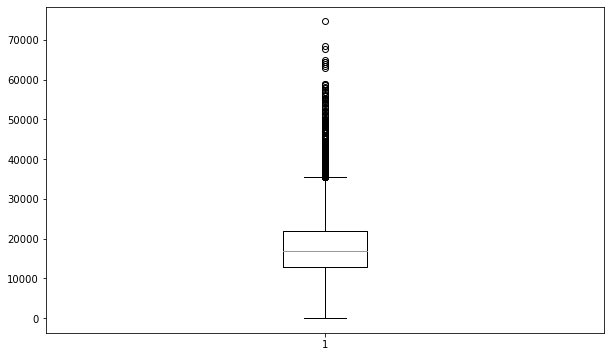

In [17]:
plt.figure(figsize=(10,6))
plt.boxplot(df.Price)

plt.show()

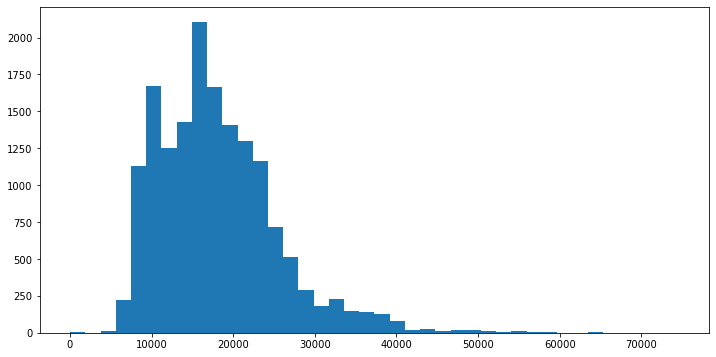

In [18]:
plt.figure(figsize=(12,6))
plt.hist(df.Price, bins=40)

plt.show()

In [19]:
# 3000'den büyük, 35475'ten küçük olan değerlerin dışındakileri outlier olarak aldık.
price_outliers=list(df[(df.Price < 3000) | (df.Price > 35475)].index) 

In [20]:
df.loc[price_outliers,'Price']= np.nan

In [21]:
df.loc[price_outliers,'Price']

713     NaN
732     NaN
3587    NaN
3589    NaN
3590    NaN
         ..
15914   NaN
15915   NaN
15916   NaN
15917   NaN
15918   NaN
Name: Price, Length: 483, dtype: float64

In [22]:
fill(df,'Model','Age','Price','ffill') # NaN olarak gelen outlier'lara ffill metoduyla doldurduk.

Number of NaN :  0
------------------
14990.0    154
15990.0    151
10990.0    139
33975.0    125
15900.0    106
          ... 
8440.0       1
13895.0      1
9965.0       1
13660.0      1
13860.0      1
Name: Price, Length: 2665, dtype: int64


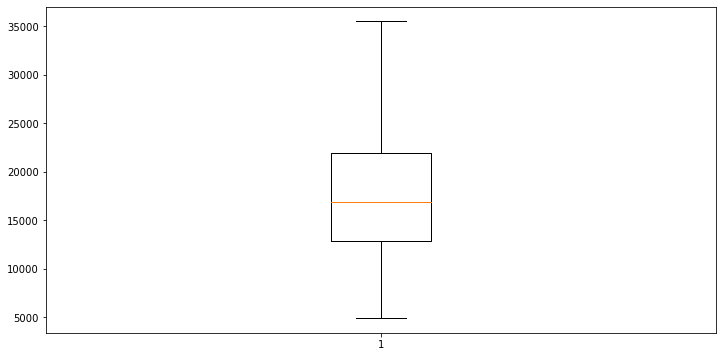

In [23]:
plt.figure(figsize=(12,6))
plt.boxplot(df.Price)

plt.show()

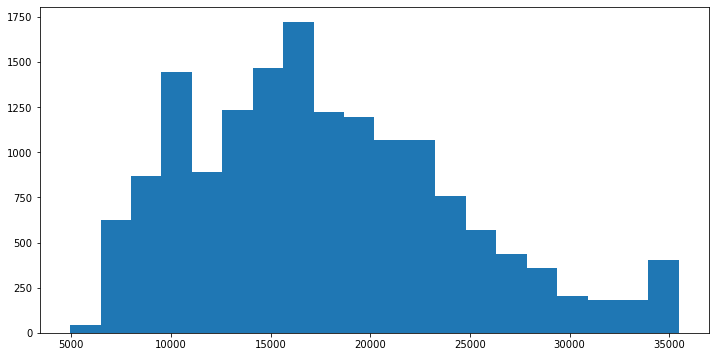

In [24]:
plt.figure(figsize=(12,6))
plt.hist(df.Price, bins=20)

plt.show()

## 📌HP

In [25]:
check_col(df,'hp')

hp , Sumation of isnull : 0
-----------------
Samples for hp 
 2533      71.0
6056     100.0
11057    103.0
13574     55.0
14813     56.0
15917    147.0
2228      70.0
1864      70.0
5018      85.0
773       66.0
Name: hp, dtype: float64
-----------------
hp Value_counts is 
 85.0     2544
66.0     2138
81.0     1403
100.0    1315
110.0    1119
         ... 
163.0       1
84.0        1
137.0       1
123.0       1
75.0        1
Name: hp, Length: 75, dtype: int64


In [26]:
df.hp.describe()

count    15919.000000
mean        88.541617
std         26.689225
min         51.000000
25%         66.000000
50%         85.000000
75%        103.000000
max        294.000000
Name: hp, dtype: float64

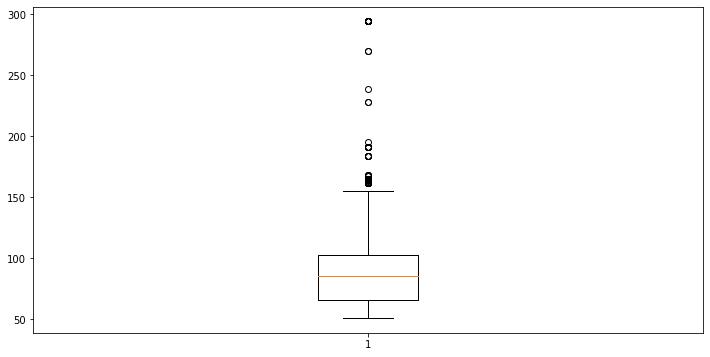

In [34]:
plt.figure(figsize=(12,6))
plt.boxplot(df.hp)

plt.show()

    📍IQR = 2,5 olarak aldik.

In [35]:
hp_anomali=list(df[df.hp < 44].index) 

In [36]:
df.loc[hp_anomali,'hp']= np.nan

In [37]:
df.loc[hp_anomali,'hp']

Series([], Name: hp, dtype: float64)

In [38]:
fill(df,'Model','Body_Type','hp','mode')

Number of NaN :  0
------------------
85.0     2544
66.0     2138
81.0     1403
100.0    1315
110.0    1119
         ... 
163.0       1
84.0        1
137.0       1
123.0       1
75.0        1
Name: hp, Length: 75, dtype: int64


In [39]:
df.hp.isnull().sum()

0

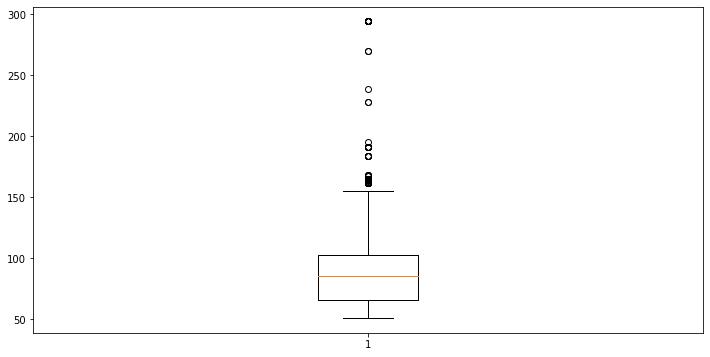

In [40]:
plt.figure(figsize=(12,6))
plt.boxplot(df.hp)

plt.show()

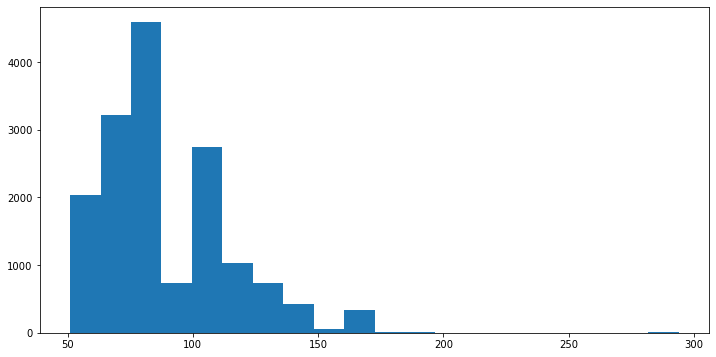

In [44]:
plt.figure(figsize=(12,6))
plt.hist(df.hp, bins=20)

plt.show()

## 📌Type

In [45]:
check_col(df,'Type')

Type , Sumation of isnull : 0
-----------------
Samples for Type 
 894                Used
9202               Used
414                Used
12808               New
10217    Pre-registered
13281              Used
7582     Employee's car
15175              Used
7477     Employee's car
9652     Pre-registered
Name: Type, dtype: object
-----------------
Type Value_counts is 
 Used              11098
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: Type, dtype: int64


## 📌 Warranty

In [46]:
check_col(df,'Warranty')

Warranty , Sumation of isnull : 0
-----------------
Samples for Warranty 
 10721    12.0
6425     12.0
15080    12.0
4174     12.0
3744     12.0
12402    24.0
34       12.0
1815     24.0
1102     24.0
3791     12.0
Name: Warranty, dtype: float64
-----------------
Warranty Value_counts is 
 12.0    9567
24.0    5211
60.0     401
36.0     279
48.0     149
6.0      125
72.0      59
3.0       33
23.0      11
18.0      10
20.0       7
25.0       6
2.0        5
16.0       4
26.0       4
50.0       4
4.0        3
34.0       3
13.0       3
19.0       3
1.0        3
21.0       2
45.0       2
11.0       2
46.0       2
9.0        2
14.0       2
28.0       2
17.0       2
22.0       2
15.0       1
33.0       1
30.0       1
56.0       1
7.0        1
8.0        1
10.0       1
49.0       1
47.0       1
40.0       1
65.0       1
Name: Warranty, dtype: int64


In [47]:
df.drop('Warranty', axis=1, inplace=True)

## 📌Brand

In [48]:
check_col(df,'Brand')

Brand , Sumation of isnull : 0
-----------------
Samples for Brand 
 1914        Audi
11081       Opel
4464        Audi
3636        Audi
4927        Audi
10340       Opel
10965       Opel
2035        Audi
13141    Renault
13061    Renault
Name: Brand, dtype: object
-----------------
Brand Value_counts is 
 Opel       7343
Audi       5712
Renault    2864
Name: Brand, dtype: int64


## 📌 Model

In [49]:
check_col(df,'Model')

Model , Sumation of isnull : 0
-----------------
Samples for Model 
 14362        Clio
4246           A3
7275        Astra
15065      Espace
5097           A3
11127    Insignia
15423      Espace
11723    Insignia
9546        Corsa
1233           A1
Name: Model, dtype: object
-----------------
Model Value_counts is 
 A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: Model, dtype: int64


## 📌Age

In [50]:
check_col(df,'Age')

Age , Sumation of isnull : 0
-----------------
Samples for Age 
 14774    0.0
9059     3.0
5667     0.0
13220    2.0
7031     1.0
4422     1.0
3814     2.0
13788    0.0
14982    1.0
15624    1.0
Name: Age, dtype: float64
-----------------
Age Value_counts is 
 1.0    4813
0.0    4077
3.0    3696
2.0    3333
Name: Age, dtype: int64


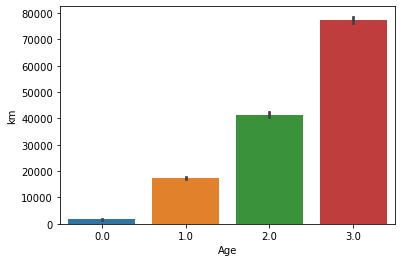

In [52]:
sns.barplot(x=df.Age,y=df.km);

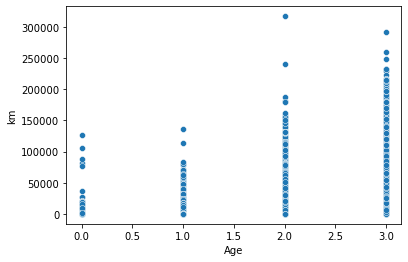

In [54]:
sns.scatterplot(x=df.Age,y=df.km);

## 📌Nr_of_Doors

In [55]:
check_col(df,'Nr_of_Doors')

Nr_of_Doors , Sumation of isnull : 0
-----------------
Samples for Nr_of_Doors 
 2818     4.0
4437     5.0
2687     5.0
11995    4.0
4658     5.0
13607    5.0
11982    5.0
302      4.0
12118    4.0
12289    4.0
Name: Nr_of_Doors, dtype: float64
-----------------
Nr_of_Doors Value_counts is 
 5.0    11789
4.0     3079
3.0      832
2.0      219
Name: Nr_of_Doors, dtype: int64


In [56]:
df.drop('Nr_of_Doors', axis=1, inplace=True)

## 📌 Number_of_Seats

In [57]:
check_col(df,'Number_of_Seats')

Number_of_Seats , Sumation of isnull : 0
-----------------
Samples for Number_of_Seats 
 1297     4.0
9413     5.0
10263    5.0
4851     5.0
13824    5.0
4039     5.0
7242     5.0
14014    5.0
13926    5.0
11858    5.0
Name: Number_of_Seats, dtype: float64
-----------------
Number_of_Seats Value_counts is 
 5.0    14179
4.0     1196
7.0      409
2.0      132
6.0        2
3.0        1
Name: Number_of_Seats, dtype: int64


In [58]:
df.drop('Number_of_Seats', axis=1, inplace=True)

## 📌Gearing_Type

In [59]:
check_col(df,'Gearing_Type')

Gearing_Type , Sumation of isnull : 0
-----------------
Samples for Gearing_Type 
 5882     Automatic
12735       Manual
10118    Automatic
13646       Manual
15514    Automatic
9214        Manual
9351     Automatic
15475    Automatic
15680    Automatic
14655       Manual
Name: Gearing_Type, dtype: object
-----------------
Gearing_Type Value_counts is 
 Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing_Type, dtype: int64


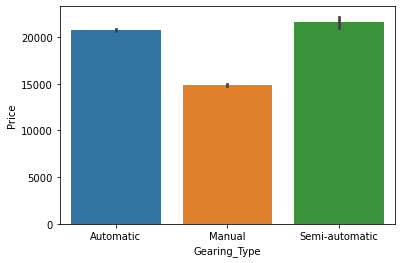

In [60]:
sns.barplot(x=df.Gearing_Type, y=df.Price);

## 📌Engine_Disp_cc

In [61]:
check_col(df,'Engine_Disp_cc')

Engine_Disp_cc , Sumation of isnull : 0
-----------------
Samples for Engine_Disp_cc 
 13635    1461.0
10377    1229.0
5432     1598.0
13913    1461.0
6735     1598.0
1221      999.0
9093     1229.0
11937    1956.0
10371    1229.0
448       999.0
Name: Engine_Disp_cc, dtype: float64
-----------------
Engine_Disp_cc Value_counts is 
 1598.0    5042
999.0     2466
1398.0    1334
1399.0     768
1229.0     677
          ... 
1696.0       1
122.0        1
140.0        1
1390.0       1
1533.0       1
Name: Engine_Disp_cc, Length: 80, dtype: int64


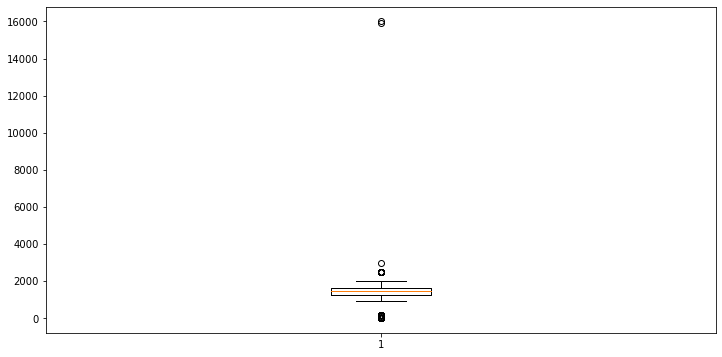

In [62]:
plt.figure(figsize=(12,6))
plt.boxplot(df.Engine_Disp_cc)

plt.show()

In [63]:
df.Engine_Disp_cc.describe()

count    15919.000000
mean      1424.332653
std        330.058129
min          1.000000
25%       1229.000000
50%       1461.000000
75%       1598.000000
max      16000.000000
Name: Engine_Disp_cc, dtype: float64

In [64]:
# Piyasadaki en düşük motor hacmi 898cc Clio marka araca aittir. Bu nedenle 898cc'den küçükleri NaN yapar median ile doldurduk.
df.sort_values(by=['Engine_Disp_cc'], ascending=True)[['Engine_Disp_cc','Model']].head(55)

,Engine_Disp_cc,Model
12849,1.0,Insignia
12786,1.0,Insignia
12783,1.0,Insignia
12781,1.0,Insignia
12769,1.0,Insignia
14321,1.0,Clio
12768,1.0,Insignia
14314,1.0,Clio
14315,1.0,Clio
14320,1.0,Clio


In [65]:
df.sort_values(by=['Engine_Disp_cc'], ascending=False)[['Engine_Disp_cc','Model']].head(55)

,Engine_Disp_cc,Model
10932,16000.0,Insignia
7169,15898.0,Astra
10771,2967.0,Insignia
3592,2480.0,A3
3609,2480.0,A3
3610,2480.0,A3
3600,2480.0,A3
3649,2480.0,A3
3648,2480.0,A3
3587,2480.0,A3


In [66]:
Engine_Disp_cc_anomalies=list(df[(df.Engine_Disp_cc < 898)|(df.Engine_Disp_cc > 2480)].index)

In [67]:
df.loc[Engine_Disp_cc_anomalies,'Engine_Disp_cc']= np.nan

In [68]:
df.loc[Engine_Disp_cc_anomalies,'Engine_Disp_cc']

7169    NaN
7809    NaN
7810    NaN
7811    NaN
7812    NaN
8128    NaN
10194   NaN
10559   NaN
10771   NaN
10932   NaN
12467   NaN
12473   NaN
12484   NaN
12499   NaN
12501   NaN
12554   NaN
12604   NaN
12670   NaN
12750   NaN
12768   NaN
12769   NaN
12781   NaN
12783   NaN
12786   NaN
12790   NaN
12796   NaN
12798   NaN
12800   NaN
12815   NaN
12823   NaN
12835   NaN
12848   NaN
12849   NaN
13653   NaN
13904   NaN
13912   NaN
14198   NaN
14284   NaN
14314   NaN
14315   NaN
14319   NaN
14320   NaN
14321   NaN
14322   NaN
14324   NaN
14325   NaN
14326   NaN
14327   NaN
14328   NaN
15574   NaN
15575   NaN
15576   NaN
15577   NaN
15578   NaN
15579   NaN
Name: Engine_Disp_cc, dtype: float64

In [69]:
fill(df, 'Model', 'Body_Type','Engine_Disp_cc','median')

Number of NaN :  0
------------------
1598.0    5076
999.0     2466
1398.0    1335
1399.0     772
1229.0     677
          ... 
1100.0       1
1195.0       1
1580.0       1
1350.0       1
1533.0       1
Name: Engine_Disp_cc, Length: 69, dtype: int64


## 📌Cylinders

In [70]:
check_col(df,'Cylinders')

Cylinders , Sumation of isnull : 0
-----------------
Samples for Cylinders 
 3039     4.0
14877    3.0
6301     4.0
12729    4.0
2884     4.0
13832    4.0
4602     3.0
2714     4.0
15671    4.0
908      3.0
Name: Cylinders, dtype: float64
-----------------
Cylinders Value_counts is 
 4.0    12741
3.0     3148
5.0       22
6.0        3
8.0        2
2.0        2
1.0        1
Name: Cylinders, dtype: int64


In [75]:
Cylinders_anomalies=list(df[(df.Cylinders < 3.0)|(df.Cylinders > 5.0)].index) #1,2,6 ve 8 i anomali olarak aldik.

In [76]:
df.loc[Cylinders_anomalies,'Cylinders']= np.nan

In [77]:
df.loc[Cylinders_anomalies,'Cylinders']

Series([], Name: Cylinders, dtype: float64)

In [78]:
fill(df,'Model','Body_Type','Cylinders','mode')

Number of NaN :  0
------------------
4.0    12748
3.0     3149
5.0       22
Name: Cylinders, dtype: int64


## Drive_chain

In [79]:
check_col(df,'Drive_chain')

Drive_chain , Sumation of isnull : 0
-----------------
Samples for Drive_chain 
 10266    front
15897      4WD
9090     front
12532      4WD
7861     front
12178    front
15749    front
12589    front
8156     front
13620    front
Name: Drive_chain, dtype: object
-----------------
Drive_chain Value_counts is 
 front    15711
4WD        204
rear         4
Name: Drive_chain, dtype: int64


In [80]:
df.drop('Drive_chain',axis = 1,inplace = True)

## Fuel

In [81]:
check_col(df,'Fuel')

Fuel , Sumation of isnull : 0
-----------------
Samples for Fuel 
 2985      Diesel
12582    Benzine
12163    Benzine
13464    Benzine
4563     Benzine
7881      Diesel
11077     Diesel
15785    Benzine
5462      Diesel
3694      Diesel
Name: Fuel, dtype: object
-----------------
Fuel Value_counts is 
 Benzine     7707
Diesel      7299
Others       844
CNG/LPG       64
Electric       5
Name: Fuel, dtype: int64


In [82]:
Fuel_missing=list(df[df.Fuel == 'Others'].index)

In [83]:
df.loc[Fuel_missing,'Fuel']= np.nan

In [84]:
fill(df,'Model','Body_Type','Fuel','mode')

Number of NaN :  0
------------------
Benzine     8273
Diesel      7577
CNG/LPG       64
Electric       5
Name: Fuel, dtype: int64


In [85]:
df.columns

Index(['Price', 'km', 'hp', 'Type', 'Brand', 'Model', 'Age', 'Gearing_Type',
       'Engine_Disp_cc', 'Cylinders', 'Fuel', 'CO2_Emission', 'Emission_Class',
       'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'Gears', 'Body_Type', 'VAT_Deductable',
       'Price_Negotiable', 'Prev_Owner', 'Inspection_New', 'Body_Color',
       'Paint_Type', 'Uphol_Material', 'Country_Cons', 'City_Cons',
       'Comb_Cons'],
      dtype='object')

## CO2_Emission

In [86]:
check_col(df,'CO2_Emission')

CO2_Emission , Sumation of isnull : 0
-----------------
Samples for CO2_Emission 
 4363      99.0
6471      10.0
2349     138.0
14750    113.0
2585     105.0
9960     143.0
13963      8.0
11686    141.0
4035     107.0
13111    120.0
Name: CO2_Emission, dtype: float64
-----------------
CO2_Emission Value_counts is 
 120.000    920
97.000     620
99.000     619
104.000    599
10.000     541
          ... 
12.324       1
45.000       1
51.000       1
13.983       1
177.000      1
Name: CO2_Emission, Length: 120, dtype: int64


In [87]:
df.drop('CO2_Emission',axis = 1,inplace = True)

## Emission_Class

In [88]:
check_col(df,'Emission_Class')

Emission_Class , Sumation of isnull : 0
-----------------
Samples for Emission_Class 
 12743    Euro 6d-TEMP
3738           Euro 6
5920           Euro 6
718            Euro 6
5393           Euro 6
7280           Euro 6
1377           Euro 6
2979           Euro 6
1460     Euro 6d-TEMP
1441           Euro 6
Name: Emission_Class, dtype: object
-----------------
Emission_Class Value_counts is 
 Euro 6          13143
Euro 6d-TEMP     2467
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             42
Name: Emission_Class, dtype: int64


In [89]:
df.drop('Emission_Class',axis = 1,inplace=True)

## Comfort_Convenience

In [90]:
check_col(df,'Comfort_Convenience') #getdummy() uygulanacak.

Comfort_Convenience , Sumation of isnull : 0
-----------------
Samples for Comfort_Convenience 
 12134    Air conditioning,Armrest,Automatic climate con...
10138    Air conditioning,Automatic climate control,Cru...
14841    Cruise control,Electrical side mirrors,Power w...
9913     Air conditioning,Automatic climate control,Cru...
2445     Air conditioning,Armrest,Automatic climate con...
15156    Air conditioning,Automatic climate control,Cru...
1103     Air conditioning,Armrest,Automatic climate con...
5981     Air conditioning,Cruise control,Electrical sid...
9957     Air conditioning,Cruise control,Electrically h...
11       Air conditioning,Automatic climate control,Ele...
Name: Comfort_Convenience, dtype: object
-----------------
Comfort_Convenience Value_counts is 
 Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                      

## Entertainment_Media

In [91]:
check_col(df,'Entertainment_Media')#getdummy() uygulanacak.

Entertainment_Media , Sumation of isnull : 0
-----------------
Samples for Entertainment_Media 
 10122    Bluetooth,Hands-free equipment,On-board comput...
5838     Bluetooth,Hands-free equipment,MP3,On-board co...
10179                                                Radio
4658                                                 Radio
9503     Bluetooth,CD player,Hands-free equipment,On-bo...
7197                       Bluetooth,MP3,On-board computer
9341     Bluetooth,Hands-free equipment,On-board comput...
930                        MP3,On-board computer,Radio,USB
7717     Bluetooth,Hands-free equipment,MP3,On-board co...
8294     Bluetooth,CD player,Hands-free equipment,On-bo...
Name: Entertainment_Media, dtype: object
-----------------
Entertainment_Media Value_counts is 
 Bluetooth,Hands-free equipment,On-board computer,Radio,USB                  1381
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB              1040
Bluetooth,CD player,Hands-free equipment,MP3,On-board 

##  Extras

In [92]:
check_col(df,'Extras') #getdummy() uygulanacak

Extras , Sumation of isnull : 0
-----------------
Samples for Extras 
 13154        Alloy wheels,Catalytic Converter,Touch screen
4330                                          Alloy wheels
13391                                         Alloy wheels
3086     Alloy wheels,Sport package,Sport seats,Sport s...
1301     Alloy wheels,Catalytic Converter,Sport seats,V...
4510                                          Alloy wheels
4566                                          Alloy wheels
985                 Alloy wheels,Sport seats,Voice Control
992                                          Sport package
791                                           Alloy wheels
Name: Extras, dtype: object
-----------------
Extras Value_counts is 
 Alloy wheels                                                                                                                      3900
Alloy wheels,Touch screen                                                                                                          83

## Safety_Security

In [93]:
check_col(df,'Safety_Security') #getdummy() uygulanacak.

Safety_Security , Sumation of isnull : 0
-----------------
Samples for Safety_Security 
 2163     ABS,Central door lock,Driver-side airbag,Elect...
1138     ABS,Central door lock,Daytime running lights,D...
2351     ABS,Central door lock,Daytime running lights,E...
4957     ABS,Driver-side airbag,Electronic stability co...
8100     ABS,Central door lock,Daytime running lights,D...
6093     ABS,Central door lock,Daytime running lights,D...
10669    ABS,Central door lock,Daytime running lights,D...
3298     ABS,Central door lock,Daytime running lights,D...
13574    ABS,Alarm system,Central door lock,Driver-side...
1743     ABS,Central door lock,Daytime running lights,D...
Name: Safety_Security, dtype: object
-----------------
Safety_Security Value_counts is 
 ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control            

##  Gears

In [94]:
check_col(df,'Gears') 

Gears , Sumation of isnull : 0
-----------------
Samples for Gears 
 3494     6.0
4408     7.0
15748    6.0
8161     6.0
15630    7.0
13871    5.0
11987    6.0
4752     6.0
4686     7.0
1618     7.0
Name: Gears, dtype: float64
-----------------
Gears Value_counts is 
 6.0     8410
5.0     5363
7.0     1908
8.0      224
9.0        6
4.0        2
1.0        2
3.0        2
50.0       1
2.0        1
Name: Gears, dtype: int64


In [95]:
Gears_anomalies=list(df[(df.Gears == 50) | (df.Gears <5)].index) # Anomaliler tespit edildi, indexlendi ve listeye alındı. 

In [97]:
df.loc[Gears_anomalies,'Gears']= np.nan # Anomalilere NaN değerler atandı.

In [98]:
fill(df,'Model','Body_Type','Gears','mode') # Nan değerler mode ile dolduruldu.

Number of NaN :  0
------------------
6.0    8414
5.0    5367
7.0    1908
8.0     224
9.0       6
Name: Gears, dtype: int64


In [99]:
df.drop('Gears',axis = 1,inplace = True) 

## Body_Type

In [100]:
check_col(df,'Body_Type') 

Body_Type , Sumation of isnull : 0
-----------------
Samples for Body_Type 
 9492           Compact
722            Compact
9032             Sedan
11510    Station wagon
4016             Sedan
6914     Station wagon
4601             Sedan
11863            Sedan
5311             Sedan
14968            Sedan
Name: Body_Type, dtype: object
-----------------
Body_Type Value_counts is 
 Sedan            8005
Station wagon    3678
Compact          3242
Van               817
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: Body_Type, dtype: int64


## VAT_Deductable

In [101]:
check_col(df,'VAT_Deductable') 

VAT_Deductable , Sumation of isnull : 0
-----------------
Samples for VAT_Deductable 
 12111     True
2703      True
9181     False
11728     True
6294     False
6586      True
144      False
6232      True
5275      True
4594      True
Name: VAT_Deductable, dtype: bool
-----------------
VAT_Deductable Value_counts is 
 True     10980
False     4939
Name: VAT_Deductable, dtype: int64


## Price_Negotiable

In [102]:
check_col(df,'Price_Negotiable') 

Price_Negotiable , Sumation of isnull : 0
-----------------
Samples for Price_Negotiable 
 11714    False
12689    False
342      False
7910     False
14988     True
10830    False
14825    False
7150     False
10439    False
5980     False
Name: Price_Negotiable, dtype: bool
-----------------
Price_Negotiable Value_counts is 
 False    15493
True       426
Name: Price_Negotiable, dtype: int64


In [103]:
df.drop('Price_Negotiable',axis = 1, inplace = True)

## Prev_Owner

In [104]:
check_col(df,'Prev_Owner') 

Prev_Owner , Sumation of isnull : 0
-----------------
Samples for Prev_Owner 
 7871     1.0
9753     1.0
8467     2.0
2883     1.0
10571    1.0
14462    1.0
3045     1.0
15356    2.0
11257    1.0
4918     1.0
Name: Prev_Owner, dtype: float64
-----------------
Prev_Owner Value_counts is 
 1.0    15055
2.0      845
3.0       17
4.0        2
Name: Prev_Owner, dtype: int64


In [105]:
df.drop('Prev_Owner',axis = 1,inplace = True)

## Inspection_New

In [106]:
check_col(df,'Inspection_New') 

Inspection_New , Sumation of isnull : 0
-----------------
Samples for Inspection_New 
 1416      No
4151      No
11087     No
4594      No
911      Yes
1128      No
6543      No
5598      No
295       No
5356      No
Name: Inspection_New, dtype: object
-----------------
Inspection_New Value_counts is 
 No     11987
Yes     3932
Name: Inspection_New, dtype: int64


## Body_Color

In [107]:
check_col(df,'Body_Color') 

Body_Color , Sumation of isnull : 0
-----------------
Samples for Body_Color 
 12088      Grey
11863     White
15064     Black
8199      White
15894     White
12939     Black
14669     White
8044      White
8881      White
15388    Silver
Name: Body_Color, dtype: object
-----------------
Body_Color Value_counts is 
 Black     3900
Grey      3615
White     3520
Silver    1707
Blue      1522
Red        995
Brown      298
Green      166
Beige      116
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body_Color, dtype: int64


In [108]:
df.drop('Body_Color',axis = 1, inplace = True)

## Paint_Type

In [109]:
check_col(df,'Paint_Type') 

Paint_Type , Sumation of isnull : 0
-----------------
Samples for Paint_Type 
 5611     Metallic
7106     Metallic
5579     Metallic
3442     Metallic
12518    Metallic
5143     Metallic
1982     Metallic
3715     Metallic
285      Metallic
7826     Metallic
Name: Paint_Type, dtype: object
-----------------
Paint_Type Value_counts is 
 Metallic       15549
Uni/basic        364
Perl effect        6
Name: Paint_Type, dtype: int64


## Uphol_Material

In [110]:
check_col(df,'Uphol_Material') 

Uphol_Material , Sumation of isnull : 0
-----------------
Samples for Uphol_Material 
 13873           Cloth
15589    Full leather
9129            Cloth
8411            Cloth
13491           Cloth
11327           Cloth
12943           Cloth
8213            Cloth
9649            Cloth
14971    Part leather
Name: Uphol_Material, dtype: object
-----------------
Uphol_Material Value_counts is 
 Cloth           13057
Part leather     1383
Full leather     1380
alcantara          55
Velour             44
Name: Uphol_Material, dtype: int64


## Country_Cons

In [113]:
check_col(df,'Country_Cons') 

Country_Cons , Sumation of isnull : 0
-----------------
Samples for Country_Cons 
 13891    7.2
1867     5.2
15800    9.2
12287    6.0
13769    7.6
13324    6.8
5888     5.8
1363     5.2
13780    6.8
6234     4.0
Name: Country_Cons, dtype: float64
-----------------
Country_Cons Value_counts is 
 5.0    1024
4.0     957
5.8     678
4.5     677
5.1     636
       ... 
3.6       2
9.0       2
8.8       2
9.5       2
9.7       1
Name: Country_Cons, Length: 69, dtype: int64


In [114]:
df.drop('Country_Cons',axis =1,inplace = True)

## City_Cons

In [115]:
check_col(df,'City_Cons') 

City_Cons , Sumation of isnull : 0
-----------------
Samples for City_Cons 
 9378     4.2
10646    4.9
11481    3.9
993      3.6
5737     4.3
15405    4.4
14680    4.2
2133     4.2
12138    4.9
8516     4.3
Name: City_Cons, dtype: float64
-----------------
City_Cons Value_counts is 
 4.2    1410
3.7    1230
4.4    1144
4.5    1049
3.8     941
3.9     937
4.1     718
4.0     712
4.7     705
4.3     627
3.5     610
4.6     590
3.1     574
3.6     562
3.3     559
4.9     547
3.4     419
4.8     372
5.3     319
5.1     255
5.7     244
5.4     243
3.2     211
5.6     181
3.0     177
5.0     143
5.2     100
6.3      55
5.5      44
6.0      43
5.8      35
1.0      35
7.7      20
6.6      19
6.4      16
2.9      16
0.0      12
2.8      10
7.1       7
6.5       4
7.3       4
5.9       3
6.7       3
2.0       3
6.9       3
7.8       2
7.0       2
7.6       1
6.1       1
8.0       1
8.6       1
Name: City_Cons, dtype: int64


In [116]:
df.drop('City_Cons',axis =1,inplace = True)

## Comb_Cons

In [117]:
check_col(df,'Comb_Cons') 

Comb_Cons , Sumation of isnull : 0
-----------------
Samples for Comb_Cons 
 12913    4.8
12544    6.0
15188    4.7
10592    5.1
6219     4.3
7091     5.4
4516     5.5
12133    5.8
2655     4.5
15628    4.7
Name: Comb_Cons, dtype: float64
-----------------
Comb_Cons Value_counts is 
 5.4    834
3.9    814
4.0    799
5.6    774
5.1    739
3.8    726
4.7    725
4.4    711
5.0    616
4.5    606
4.8    596
4.6    552
5.2    524
4.2    485
5.3    479
5.5    437
4.9    428
3.7    414
3.3    396
5.9    393
4.3    391
4.1    389
5.7    386
3.5    344
6.0    341
6.2    233
3.6    218
5.8    199
6.3    189
6.1    176
6.6    171
6.8    149
3.4    126
3.0     82
6.4     77
7.4     70
6.7     52
6.5     39
1.0     38
7.1     38
3.2     33
6.9     28
8.3     21
7.6     14
7.0     12
3.1     11
7.8     10
7.2      8
8.0      6
8.6      5
8.7      3
7.9      2
7.5      2
7.3      2
8.1      2
0.0      2
1.2      1
9.1      1
Name: Comb_Cons, dtype: int64


## km

In [119]:
check_col(df,'km') 

km , Sumation of isnull : 0
-----------------
Samples for km 
 1999       100.0
13738    28500.0
13834     7000.0
6765     58200.0
6604     25078.0
7971         6.0
4609     17976.0
8456      4900.0
8842      5977.0
2360      1900.0
Name: km, dtype: float64
-----------------
km Value_counts is 
 10.000000       1045
1748.271975      812
1.000000         367
17479.470969     180
5.000000         170
                ... 
20719.000000       1
91910.000000       1
39860.000000       1
28084.000000       1
57889.000000       1
Name: km, Length: 6693, dtype: int64


In [126]:
df.rename(columns = {'km':'KM'}, inplace = True)

In [127]:
df.columns

Index(['Price', 'KM', 'hp', 'Type', 'Brand', 'Model', 'Age', 'Gearing_Type',
       'Engine_Disp_cc', 'Cylinders', 'Fuel', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'VAT_Deductable', 'Inspection_New', 'Paint_Type', 'Uphol_Material',
       'Comb_Cons'],
      dtype='object')

In [128]:
df.shape

(15919, 21)

## Data Visualization 

In [132]:
# Numeric column'ları listeleyerek visualization yapıldı.
numeric_column=['Price', 'KM', 'Age', 'hp', 'Engine_Disp_cc', 'Cylinders', 'Comb_Cons']

In [133]:
df_num_column=df[numeric_column]

In [134]:
df_num_column

,Price,KM,Age,hp,Engine_Disp_cc,Cylinders,Comb_Cons
0,15770.0,56013.000000,3.0,66.0,1422.0,3.0,3.8
1,14500.0,80000.000000,2.0,141.0,1798.0,4.0,5.6
2,14640.0,83450.000000,3.0,85.0,1598.0,3.0,3.8
3,14500.0,73000.000000,3.0,66.0,1422.0,3.0,3.8
4,16790.0,16200.000000,3.0,66.0,1422.0,3.0,4.1
...,...,...,...,...,...,...,...
15914,33975.0,1748.271975,0.0,147.0,1997.0,4.0,5.3
15915,33975.0,9900.000000,0.0,165.0,1798.0,4.0,6.8
15916,33975.0,15.000000,0.0,146.0,1997.0,4.0,5.3
15917,33975.0,10.000000,0.0,147.0,1997.0,4.0,5.3


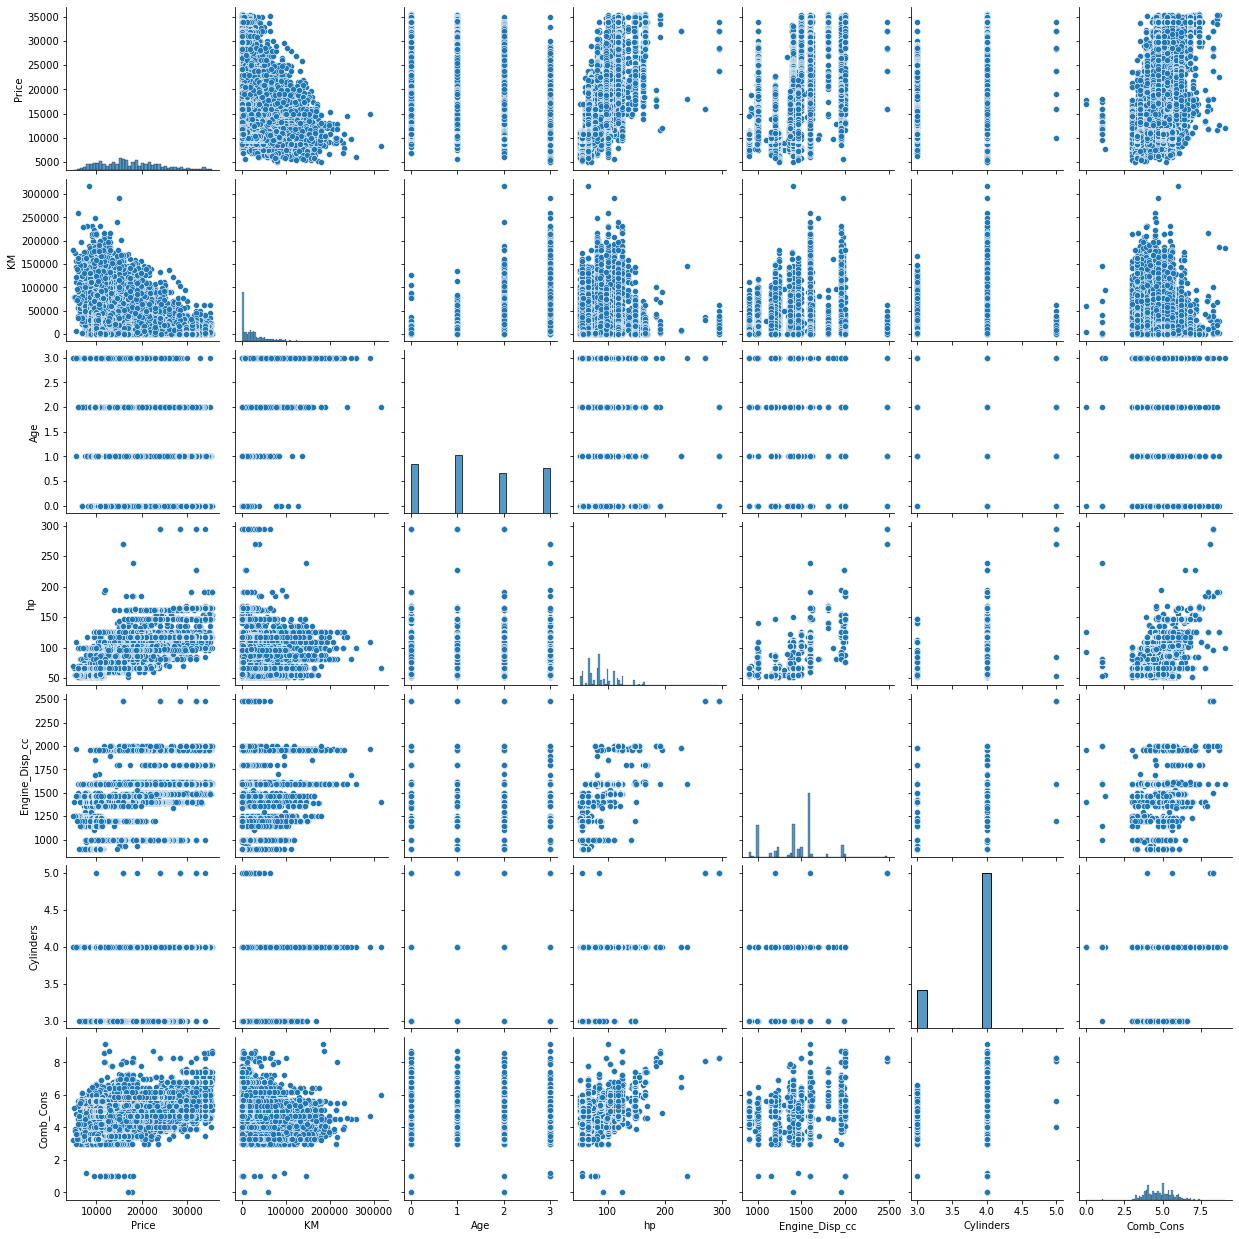

In [135]:
sns.pairplot(df_num_column, size=2.5)

plt.show()

In [136]:
df_num_column.corr()

,Price,KM,Age,hp,Engine_Disp_cc,Cylinders,Comb_Cons
Price,1.000000,-0.416244,-0.489023,0.667199,0.258124,-0.049656,0.269737
KM,-0.416244,1.000000,0.751166,0.001689,0.296555,0.186828,-0.326854
Age,-0.489023,0.751166,1.000000,-0.090962,0.196621,0.120760,-0.349193
hp,0.667199,0.001689,-0.090962,1.000000,0.602586,0.281389,0.402955
Engine_Disp_cc,0.258124,0.296555,0.196621,0.602586,1.000000,0.620237,0.026634
Cylinders,-0.049656,0.186828,0.120760,0.281389,0.620237,1.000000,0.180721
Comb_Cons,0.269737,-0.326854,-0.349193,0.402955,0.026634,0.180721,1.000000


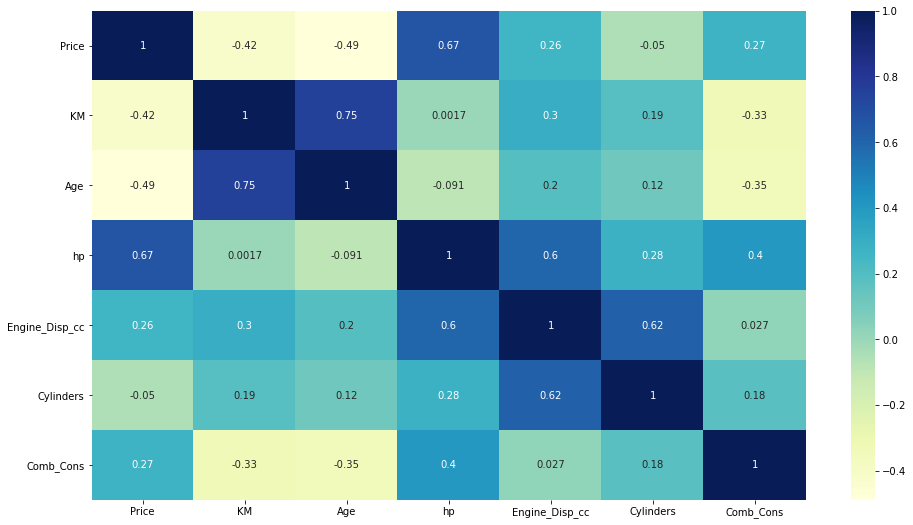

In [137]:
plt.figure(figsize = (16,9))
sns.heatmap(df_num_column.corr(),cmap="YlGnBu", annot=True)
plt.show();

In [138]:
df.to_csv('Part_3_final_not_dummy.csv', index=False)

In [139]:
df.shape

(15919, 21)

## GET DUMMİES OPERATİON

In [151]:
df = pd.read_csv('Part_3_final_not_dummy.csv')

In [152]:
df = df.join(df['Comfort_Convenience'].str.get_dummies(",").add_prefix("Cc_"))

In [153]:
df.shape

(15919, 59)

In [155]:
df = df.join(df['Entertainment_Media'].str.get_dummies(",").add_prefix("Ee_"))

In [156]:
df.shape

(15919, 69)

In [157]:
df = df.join(df['Extras'].str.get_dummies(",").add_prefix("Ex_"))

In [158]:
df.shape

(15919, 86)

In [159]:
df = df.join(df['Safety_Security'].str.get_dummies(",").add_prefix("Ss_"))

In [160]:
df.shape

(15919, 115)

In [161]:
df.drop(["Entertainment_Media","Comfort_Convenience","Extras","Safety_Security"],axis=1,inplace = True)

In [162]:
df.shape

(15919, 111)

In [165]:
df_final = pd.get_dummies(df)

In [166]:
df_final.shape

(15919, 144)

In [167]:
list(df_final.columns)

['Price',
 'KM',
 'hp',
 'Age',
 'Engine_Disp_cc',
 'Cylinders',
 'VAT_Deductable',
 'Comb_Cons',
 'Cc_Air conditioning',
 'Cc_Air suspension',
 'Cc_Armrest',
 'Cc_Automatic climate control',
 'Cc_Auxiliary heating',
 'Cc_Cruise control',
 'Cc_Electric Starter',
 'Cc_Electric tailgate',
 'Cc_Electrical side mirrors',
 'Cc_Electrically adjustable seats',
 'Cc_Electrically heated windshield',
 'Cc_Heads-up display',
 'Cc_Heated steering wheel',
 'Cc_Hill Holder',
 'Cc_Keyless central door lock',
 'Cc_Leather seats',
 'Cc_Leather steering wheel',
 'Cc_Light sensor',
 'Cc_Lumbar support',
 'Cc_Massage seats',
 'Cc_Multi-function steering wheel',
 'Cc_Navigation system',
 'Cc_Panorama roof',
 'Cc_Park Distance Control',
 'Cc_Parking assist system camera',
 'Cc_Parking assist system self-steering',
 'Cc_Parking assist system sensors front',
 'Cc_Parking assist system sensors rear',
 'Cc_Power windows',
 'Cc_Rain sensor',
 'Cc_Seat heating',
 'Cc_Seat ventilation',
 'Cc_Split rear seats',
 'C

In [168]:
df_final.to_csv('final_scout_done_dummy.csv', index=False)